<a href="https://colab.research.google.com/github/tinemyumi/saude-mental-datasus/blob/main/notebook/s8_EDA_caps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório**

## **Conteúdo**


## **Histórico de Alterações**
- **Data:** 10/02/2026 | **Autor:** Larissa Tinem |

# **1. Conexão com Google Drive e Importação das Bibliotecas**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# **2. Criação do DataFrame**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CNES_Estabelecimentos/cnes_estabelecimentos_caps_sp.csv', sep=';', encoding='latin1')
df.head()

/tmp/ipython-input-2378305578.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/CNES_Estabelecimentos/cnes_estabelecimentos_caps_sp.csv', sep=';', encoding='latin1')


,CO_CNES,CO_UNIDADE,CO_UF,CO_IBGE,NU_CNPJ_MANTENEDORA,NO_RAZAO_SOCIAL,NO_FANTASIA,CO_NATUREZA_ORGANIZACAO,DS_NATUREZA_ORGANIZACAO,TP_GESTAO,...,NO_EMAIL,CO_NATUREZA_JUR,ST_CENTRO_CIRURGICO,ST_CENTRO_OBSTETRICO,ST_CENTRO_NEONATAL,ST_ATEND_HOSPITALAR,ST_SERVICO_APOIO,ST_ATEND_AMBULATORIAL,CO_MOTIVO_DESAB,CO_AMBULATORIAL_SUS
0,19,"2,6029E+12",26,260290,"1,12944E+13",PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR JAMACI DE MEDEIROS,NaN,NaN,M,...,NaN,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
1,27,"2,6029E+12",26,260290,"1,09305E+13",CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,CASA DE SAUDE SANTA HELENA,NaN,NaN,M,...,NaN,2062.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM
2,35,"2,6029E+12",26,260290,"1,12944E+13",PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,HOSPITAL MENDO SAMPAIO,NaN,NaN,M,...,NaN,1244.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,SIM
3,43,"2,6029E+12",26,260290,"1,12944E+13",PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA DR MANUEL GOMES,NaN,NaN,M,...,NaN,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM
4,51,"2,6029E+12",26,260290,"1,12944E+13",PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,POLICLINICA VICENTE MENDES,NaN,NaN,M,...,NaN,1244.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,SIM


## **1.1. Filtro estado de São Paulo, estabelcimento CAPS e colunas para análise**

In [ ]:
# Filtragem de CAPS do Estado de São Paulo (CO_UF = 35) e nome fantasia que contenha 'CAPS'

df_sp = df[
    (df['CO_UF'] == 35) &
    (df['NO_FANTASIA'].str.contains('CAPS', case=False, na=False))
    ]

In [ ]:
# Filtrando apenas as colunas necessárias para análise
colunas_analise = [
    'CO_CNES',
    'CO_UF',
    'CO_IBGE',
    'NO_RAZAO_SOCIAL',
    'NO_FANTASIA',
    'TP_GESTAO',
    'CO_ESFERA_ADMINISTRATIVA',
    'DS_ESFERA_ADMINISTRATIVA',
    'CO_ATIVIDADE',
    'TP_UNIDADE',
    'CO_CEP',
    'NO_LOGRADOURO',
    'NU_ENDERECO',
    'NO_BAIRRO',
    'NU_LATITUDE',
    'NU_LONGITUDE'
]

df_sp = df_sp[colunas_analise]
df_sp.head()


,CO_CNES,CO_UF,CO_IBGE,NO_RAZAO_SOCIAL,NO_FANTASIA,TP_GESTAO,CO_ESFERA_ADMINISTRATIVA,DS_ESFERA_ADMINISTRATIVA,CO_ATIVIDADE,TP_UNIDADE,CO_CEP,NO_LOGRADOURO,NU_ENDERECO,NO_BAIRRO,NU_LATITUDE,NU_LONGITUDE
654,8516,35,354780,PREFEITURA MUNICIPAL DE SANTO ANDRE,CAPS III PRACA CHILE,M,M,MUNICIPAL,3,70,9210270,PRACA CHILE,140,PRQ DAS NACOES,-23.639.186,-46.525.738
673,8729,35,354780,PREFEITURA MUNICIPAL DE SANTO ANDRE,CAPS III IANA PROFETA RIBEIRO,M,M,MUNICIPAL,3,70,9015191,RUA GENERAL GLICERIO,537,CENTRO,-236.542.733.747,-465.340.518.951
678,8796,35,354780,PREFEITURA MUNICIPAL DE SANTO ANDRE,CAPS III AD BARBARA DA SILVA SANTOS,M,M,MUNICIPAL,3,70,9030310,RUA VENEZUELA,91,CENTRO,-23.663.405,-46.522.236
734,9482,35,354990,PREFEITURA MUNICIPAL DE SAO JOSE DOS CAMPOS,CAPS LESTE,M,M,MUNICIPAL,4,70,12215170,AVENIDA BRASIL,347,MONTE CASTELO,-231.842.555,-45.874.174
3041,39489,35,353980,MUNICIPIO DE POA,CAPS II,M,M,MUNICIPAL,4,70,8556470,RUA FRANCISCO ROMERO RAMOS,174,CENTRO,-235.142.259.205,-463.444.505.322


# **3. Análise Exploratória**

## **3.1. Limpeza e Validação**

In [ ]:
# Número de linhas e colunas

df_sp.shape

(603, 16)

In [ ]:
# Colunas do DF

df_sp.columns

Index(['CO_CNES', 'CO_UF', 'CO_IBGE', 'NO_RAZAO_SOCIAL', 'NO_FANTASIA',
       'TP_GESTAO', 'CO_ESFERA_ADMINISTRATIVA', 'DS_ESFERA_ADMINISTRATIVA',
       'CO_ATIVIDADE', 'TP_UNIDADE', 'CO_CEP', 'NO_LOGRADOURO', 'NU_ENDERECO',
       'NO_BAIRRO', 'NU_LATITUDE', 'NU_LONGITUDE'],
      dtype='object')

In [ ]:
# Informações dos dados

df_sp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 654 to 588741
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CO_CNES                   603 non-null    int64 
 1   CO_UF                     603 non-null    int64 
 2   CO_IBGE                   603 non-null    int64 
 3   NO_RAZAO_SOCIAL           603 non-null    object
 4   NO_FANTASIA               603 non-null    object
 5   TP_GESTAO                 603 non-null    object
 6   CO_ESFERA_ADMINISTRATIVA  603 non-null    object
 7   DS_ESFERA_ADMINISTRATIVA  603 non-null    object
 8   CO_ATIVIDADE              603 non-null    int64 
 9   TP_UNIDADE                603 non-null    int64 
 10  CO_CEP                    603 non-null    int64 
 11  NO_LOGRADOURO             603 non-null    object
 12  NU_ENDERECO               603 non-null    object
 13  NO_BAIRRO                 603 non-null    object
 14  NU_LATITUDE               

In [ ]:
# Verificação de valores ausentes
df_sp.isnull().sum()

,0
CO_CNES,0
CO_UF,0
CO_IBGE,0
NO_RAZAO_SOCIAL,0
NO_FANTASIA,0
TP_GESTAO,0
CO_ESFERA_ADMINISTRATIVA,0
DS_ESFERA_ADMINISTRATIVA,0
CO_ATIVIDADE,0
TP_UNIDADE,0


In [ ]:
# Verificação de valores duplicados

df_sp.duplicated().value_counts()

,count
False,603


## **3.2. Visão Geral**

### **3.2.1. Quantidade de registros no Dataframe**

In [ ]:
total_caps = len(df_sp)
print('Total de CAPS: ', total_caps)

Total de CAPS:  603


### **3.2.2. Existe registro duplicado por CO_CNES?**

In [ ]:
df_sp['CO_CNES'].duplicated().value_counts()

,count
CO_CNES,
False,603


### **3.2.3. Tipo de CAPS**

In [ ]:
import re

df_sp['NO_FANTASIA_UP'] = df_sp['NO_FANTASIA'].str.upper().str.strip()

pattern = (
    r'(CAPS\s+AD\s+III|CAPS\s+AD\s+II|CAPS\s+AD\s+I|CAPS\s+AD|'
    r'CAPS\s+III|CAPS\s+II|CAPS\s+I|'
    r'CAPS\s+INFANTIL|CAPS\s+INFANTOJUVENIL|CAPS\s+INF|CAPS)'
)

df_sp['TIPO_CAPS'] = df_sp['NO_FANTASIA_UP'].str.extract(pattern, flags=re.IGNORECASE)

df_sp['TIPO_CAPS'].value_counts(dropna=False)


,count
TIPO_CAPS,
CAPS I,226
CAPS,116
CAPS AD,97
CAPS II,71
CAPS III,36
CAPS AD III,35
CAPS AD II,20
CAPS AD I,2


## **3.3. Distribuição Territorial**

### **3.3.1. Distribuição por município**

**Análise Inicial**

Os dados mostram uma forte concentração de CAPS na capital, que sozinha detém quase 21% das unidades de São Paulo. Existe uma queda muito brusca na oferta quando olhamos para as cidades do interior e outras regiões metropolitanas, como Campinas e Sorocaba, que ficam longe dessa marca. Essa desigualdade sugere que o acesso ao tratamento de saúde mental é muito mais difícil fora da capital, o que pode sobrecarregar as internações hospitalares onde o suporte dos CAPS é menor.

In [ ]:
df_sp = df_sp.copy()

# Dicionário de substituição

# Subtituindo CO_IBGE TOP 10
df_sp['CO_IBGE'] = df_sp['CO_IBGE'].astype(str).replace({
    '355030': 'São Paulo',
    '350950': 'Campinas',
    '355220': 'Sorocaba',
    '354850': 'Santos',
    '354870': 'São Bernardo do Campo',
    '354340': 'Ribeirão Preto',
    '351880': 'Guarulhos',
    '354980': 'São José do Rio Preto',
    '354780': 'Santo André',
    '351620': 'Franca',
    '350600': 'Bauru'
})

In [ ]:
caps_por_municipio = (
    df_sp
    .groupby('CO_IBGE')['CO_CNES']
    .count()
    .reset_index(name='qtde_caps')
    .sort_values('qtde_caps', ascending=False)
)

# Percentual de caps por município
caps_por_municipio['percentual'] = (caps_por_municipio['qtde_caps']/caps_por_municipio['qtde_caps'].sum())*100

# Top 10 caps por município
top10 = caps_por_municipio.head(10)

top10

,CO_IBGE,qtde_caps,percentual
249,São Paulo,126,20.895522
240,Campinas,14,2.321725
246,Sorocaba,10,1.658375
245,Santos,9,1.492537
247,São Bernardo do Campo,9,1.492537
242,Guarulhos,8,1.326700
243,Ribeirão Preto,8,1.326700
248,São José do Rio Preto,7,1.160862
244,Santo André,5,0.829187
241,Franca,5,0.829187


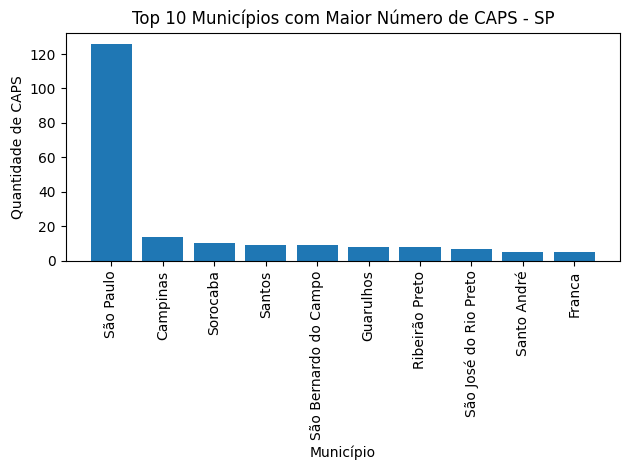

In [ ]:
plt.figure()
plt.bar(top10['CO_IBGE'].astype(str), top10['qtde_caps'])
plt.xticks(rotation=90)
plt.xlabel('Município')
plt.ylabel('Quantidade de CAPS')
plt.title('Top 10 Municípios com Maior Número de CAPS - SP')
plt.tight_layout()
plt.show()

O histograma confirma visualmente a enorme desigualdade na rede de saúde mental em São Paulo: a grande maioria dos municípios possui pouquíssimas unidades de CAPS, concentrando-se na primeira barra à esquerda. O "ponto isolado" na extremidade direita representa a capital, evidenciando um abismo na oferta de serviços territoriais entre a metrópole e o restante do estado.

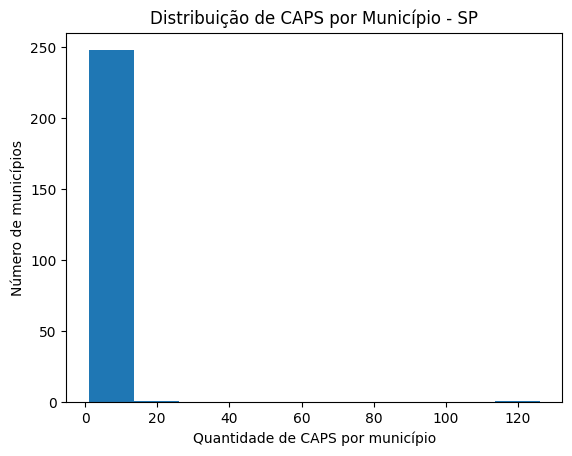

In [ ]:
plt.figure()
plt.hist(caps_por_municipio['qtde_caps'])
plt.xlabel('Quantidade de CAPS por município')
plt.ylabel('Número de municípios')
plt.title('Distribuição de CAPS por Município - SP')
plt.show()


## **3.4. Perfil Administrativo**

### **3.4.1. Esfera Administrativa**

**Análise Inicial**

O gráfico de Esfera Administrativa mostra que a gestão da rede CAPS em São Paulo é massivamente municipal, com quase 600 unidades sob responsabilidade das prefeituras contra uma presença estadual mínima. Isso indica que o cuidado em saúde mental é uma política executada na ponta, diretamente pelas cidades. Combinando os dois gráficos, vemos que embora a responsabilidade seja municipal, a capacidade de oferta é extremamente desigual, concentrada em pouquíssimos municípios de grande porte.

In [ ]:
df_sp.columns

Index(['CO_CNES', 'CO_UF', 'CO_IBGE', 'NO_RAZAO_SOCIAL', 'NO_FANTASIA',
       'TP_GESTAO', 'CO_ESFERA_ADMINISTRATIVA', 'DS_ESFERA_ADMINISTRATIVA',
       'CO_ATIVIDADE', 'TP_UNIDADE', 'CO_CEP', 'NO_LOGRADOURO', 'NU_ENDERECO',
       'NO_BAIRRO', 'NU_LATITUDE', 'NU_LONGITUDE', 'NO_FANTASIA_UP',
       'TIPO_CAPS'],
      dtype='object')

In [ ]:
caps_esfera_administrativa = (
    df_sp
    .groupby('DS_ESFERA_ADMINISTRATIVA')['CO_CNES']
    .count()
    .reset_index(name='qtde_caps')
)

caps_esfera_administrativa.head()

,DS_ESFERA_ADMINISTRATIVA,qtde_caps
0,ESTADUAL,5
1,MUNICIPAL,598


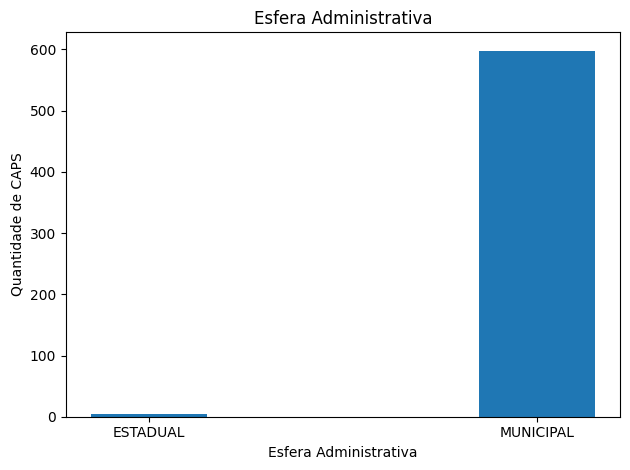

In [ ]:
plt.figure()
plt.bar(caps_esfera_administrativa['DS_ESFERA_ADMINISTRATIVA'], caps_esfera_administrativa['qtde_caps'], width=0.3)
plt.title('Esfera Administrativa')
plt.xlabel('Esfera Administrativa')
plt.ylabel('Quantidade de CAPS')
plt.tight_layout()
plt.show()